In [1]:
import re
import pandas as pd
pd.set_option("display.max_colwidth", 200)
import seaborn as sns
import string
import nltk
import numpy as np
import warnings 
warnings.filterwarnings("ignore", category=DeprecationWarning)

%matplotlib inline

In [2]:
data = pd.read_csv('C:/Users/dhiren/Downloads/data_from_fb.csv')
print(data)

                                                                                                                                                                                                   description
0      Canadian pharmacies are limiting how much medication can be dispensed to try to prevent shortages, recognizing that most active ingredients for drugs come from India and China and medical supply c...
1                                         The Yukon government has identified two places in Whitehorse — a church and a dental clinic — where people may have been exposed to the coronavirus in recent weeks.
2                                 The Senate has passed an unparalleled $2.2 trillion economic rescue package steering aid to businesses, workers and health care systems engulfed by the coronavirus pandemic
3                                              Scientists around the world are racing to find novel ways to treat, mitigate or prevent infection from the novel coronavirus.

In [3]:
df2 = pd.DataFrame(data)
print(df2.head())

                                                                                                                                                                                               description
0  Canadian pharmacies are limiting how much medication can be dispensed to try to prevent shortages, recognizing that most active ingredients for drugs come from India and China and medical supply c...
1                                     The Yukon government has identified two places in Whitehorse — a church and a dental clinic — where people may have been exposed to the coronavirus in recent weeks.
2                             The Senate has passed an unparalleled $2.2 trillion economic rescue package steering aid to businesses, workers and health care systems engulfed by the coronavirus pandemic
3                                          Scientists around the world are racing to find novel ways to treat, mitigate or prevent infection from the novel coronavirus. Here are the latest

In [4]:
import nltk
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\dhiren\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [5]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer

vader = SentimentIntensityAnalyzer()

# Iterate through the headlines and get the polarity scores using vader
scores = df2['description'].apply(vader.polarity_scores).tolist()

# Convert the 'scores' list of dicts into a DataFrame
scores_df = pd.DataFrame(scores)

# Join the DataFrames of the news and the list of dicts
df2 = df2.join(scores_df, rsuffix='_right')

In [6]:
df2

,description,neg,neu,pos,compound
0,"Canadian pharmacies are limiting how much medication can be dispensed to try to prevent shortages, recognizing that most active ingredients for drugs come from India and China and medical supply c...",0.038,0.863,0.098,0.3597
1,The Yukon government has identified two places in Whitehorse — a church and a dental clinic — where people may have been exposed to the coronavirus in recent weeks.,0.051,0.949,0.000,-0.0772
2,"The Senate has passed an unparalleled $2.2 trillion economic rescue package steering aid to businesses, workers and health care systems engulfed by the coronavirus pandemic",0.000,0.780,0.220,0.7579
3,"Scientists around the world are racing to find novel ways to treat, mitigate or prevent infection from the novel coronavirus. Here are the latest developments.",0.000,0.714,0.286,0.7506
4,"The latest on the coronavirus outbreak from CBC News for Thursday, March 26",0.000,1.000,0.000,0.0000
...,...,...,...,...,...
14900,"A healthy lifestyle leads to healthy aging. Learn various exercise to help with your endurance, strength, balance, and flexibility to be happy and healthy. https://go.hc.gov/303AVvb #HealthyAgingM...",0.000,0.486,0.514,0.9590
14901,#Medicaid & #CHIP provide free or low-cost health coverage to millions of Americans. And there is no Open Enrollment period! So what are you waiting for? Make sure your family is covered: https://...,0.058,0.788,0.155,0.5707
14902,"#DYK: More than 4,000 Americans are diagnosed with cancer every day? Take care of your health and get screened today. https://go.hc.gov/300oAHW #StandUpToCancer",0.159,0.725,0.116,-0.2960
14903,"We will never forget the lives we lost on this day 18 years ago, and honor those that risked their lives to save others. #NeverForget",0.130,0.620,0.250,0.5948


In [7]:
def remove_pattern(input_txt, pattern):
    r = re.findall(pattern, input_txt)
    for i in r:
        input_txt = re.sub(i, '', input_txt)
        
    return input_txt

In [8]:
import numpy as np

df2['description'] = np.vectorize(remove_pattern)(df2['description'], "@[\w]*") 
df2.head()

,description,neg,neu,pos,compound
0,"Canadian pharmacies are limiting how much medication can be dispensed to try to prevent shortages, recognizing that most active ingredients for drugs come from India and China and medical supply c...",0.038,0.863,0.098,0.3597
1,The Yukon government has identified two places in Whitehorse — a church and a dental clinic — where people may have been exposed to the coronavirus in recent weeks.,0.051,0.949,0.000,-0.0772
2,"The Senate has passed an unparalleled $2.2 trillion economic rescue package steering aid to businesses, workers and health care systems engulfed by the coronavirus pandemic",0.000,0.780,0.220,0.7579
3,"Scientists around the world are racing to find novel ways to treat, mitigate or prevent infection from the novel coronavirus. Here are the latest developments.",0.000,0.714,0.286,0.7506
4,"The latest on the coronavirus outbreak from CBC News for Thursday, March 26",0.000,1.000,0.000,0.0000


In [9]:
df2['description'] = df2['description'].str.replace("[^a-zA-Z#]", " ")
df2.head()

,description,neg,neu,pos,compound
0,Canadian pharmacies are limiting how much medication can be dispensed to try to prevent shortages recognizing that most active ingredients for drugs come from India and China and medical supply c...,0.038,0.863,0.098,0.3597
1,The Yukon government has identified two places in Whitehorse a church and a dental clinic where people may have been exposed to the coronavirus in recent weeks,0.051,0.949,0.000,-0.0772
2,The Senate has passed an unparalleled trillion economic rescue package steering aid to businesses workers and health care systems engulfed by the coronavirus pandemic,0.000,0.780,0.220,0.7579
3,Scientists around the world are racing to find novel ways to treat mitigate or prevent infection from the novel coronavirus Here are the latest developments,0.000,0.714,0.286,0.7506
4,The latest on the coronavirus outbreak from CBC News for Thursday March,0.000,1.000,0.000,0.0000


In [10]:
df2['description'] = df2['description'].apply(lambda x: ' '.join([w for w in x.split() if len(w)>3]))
df2.head()

,description,neg,neu,pos,compound
0,Canadian pharmacies limiting much medication dispensed prevent shortages recognizing that most active ingredients drugs come from India China medical supply chains have been disrupted spread COVID,0.038,0.863,0.098,0.3597
1,Yukon government identified places Whitehorse church dental clinic where people have been exposed coronavirus recent weeks,0.051,0.949,0.000,-0.0772
2,Senate passed unparalleled trillion economic rescue package steering businesses workers health care systems engulfed coronavirus pandemic,0.000,0.780,0.220,0.7579
3,Scientists around world racing find novel ways treat mitigate prevent infection from novel coronavirus Here latest developments,0.000,0.714,0.286,0.7506
4,latest coronavirus outbreak from News Thursday March,0.000,1.000,0.000,0.0000


In [11]:
tokenized_tweet = df2['description'].apply(lambda x: x.split()) # tokenizing
tokenized_tweet.head()

0    [Canadian, pharmacies, limiting, much, medication, dispensed, prevent, shortages, recognizing, that, most, active, ingredients, drugs, come, from, India, China, medical, supply, chains, have, been...
1                                                                [Yukon, government, identified, places, Whitehorse, church, dental, clinic, where, people, have, been, exposed, coronavirus, recent, weeks]
2                                                 [Senate, passed, unparalleled, trillion, economic, rescue, package, steering, businesses, workers, health, care, systems, engulfed, coronavirus, pandemic]
3                                                          [Scientists, around, world, racing, find, novel, ways, treat, mitigate, prevent, infection, from, novel, coronavirus, Here, latest, developments]
4                                                                                                                                               [latest, coronavirus, outbreak, from

In [12]:
from nltk.stem.porter import *
stemmer = PorterStemmer()

tokenized_tweet = tokenized_tweet.apply(lambda x: [stemmer.stem(i) for i in x]) # stemming

In [13]:
for i in range(len(tokenized_tweet)):
    tokenized_tweet[i] = ' '.join(tokenized_tweet[i])
    
df2['description'] = tokenized_tweet

In [14]:
df2

,description,neg,neu,pos,compound
0,canadian pharmaci limit much medic dispens prevent shortag recogn that most activ ingredi drug come from india china medic suppli chain have been disrupt spread covid,0.038,0.863,0.098,0.3597
1,yukon govern identifi place whitehors church dental clinic where peopl have been expos coronaviru recent week,0.051,0.949,0.000,-0.0772
2,senat pass unparallel trillion econom rescu packag steer busi worker health care system engulf coronaviru pandem,0.000,0.780,0.220,0.7579
3,scientist around world race find novel way treat mitig prevent infect from novel coronaviru here latest develop,0.000,0.714,0.286,0.7506
4,latest coronaviru outbreak from new thursday march,0.000,1.000,0.000,0.0000
...,...,...,...,...,...
14900,healthi lifestyl lead healthi age learn variou exercis help with your endur strength balanc flexibl happi healthi http avvb #healthyagingmonth #wednesdaywisdom,0.000,0.486,0.514,0.9590
14901,#medicaid #chip provid free cost health coverag million american there open enrol period what wait make sure your famili cover http #mondaymotiv,0.058,0.788,0.155,0.5707
14902,#dyk more than american diagnos with cancer everi take care your health screen today http oahw #standuptocanc,0.159,0.725,0.116,-0.2960
14903,will never forget live lost thi year honor those that risk their live save other #neverforget,0.130,0.620,0.250,0.5948


In [15]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer()
tfidf.fit(df2['description'])

TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.float64'>, encoding='utf-8',
                input='content', lowercase=True, max_df=1.0, max_features=None,
                min_df=1, ngram_range=(1, 1), norm='l2', preprocessor=None,
                smooth_idf=True, stop_words=None, strip_accents=None,
                sublinear_tf=False, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=None, use_idf=True, vocabulary=None)

In [16]:
X = tfidf.transform(df2['description'])

In [17]:
compound_list = df2['compound'].to_list()

In [18]:
new_compound_list = []

for i in compound_list:
    
    if i <= 0:
        new_compound_list.append(0)
    else:
        new_compound_list.append(1)

In [19]:
df2['sentiment'] = new_compound_list

In [20]:
df2

,description,neg,neu,pos,compound,sentiment
0,canadian pharmaci limit much medic dispens prevent shortag recogn that most activ ingredi drug come from india china medic suppli chain have been disrupt spread covid,0.038,0.863,0.098,0.3597,1
1,yukon govern identifi place whitehors church dental clinic where peopl have been expos coronaviru recent week,0.051,0.949,0.000,-0.0772,0
2,senat pass unparallel trillion econom rescu packag steer busi worker health care system engulf coronaviru pandem,0.000,0.780,0.220,0.7579,1
3,scientist around world race find novel way treat mitig prevent infect from novel coronaviru here latest develop,0.000,0.714,0.286,0.7506,1
4,latest coronaviru outbreak from new thursday march,0.000,1.000,0.000,0.0000,0
...,...,...,...,...,...,...
14900,healthi lifestyl lead healthi age learn variou exercis help with your endur strength balanc flexibl happi healthi http avvb #healthyagingmonth #wednesdaywisdom,0.000,0.486,0.514,0.9590,1
14901,#medicaid #chip provid free cost health coverag million american there open enrol period what wait make sure your famili cover http #mondaymotiv,0.058,0.788,0.155,0.5707,1
14902,#dyk more than american diagnos with cancer everi take care your health screen today http oahw #standuptocanc,0.159,0.725,0.116,-0.2960,0
14903,will never forget live lost thi year honor those that risk their live save other #neverforget,0.130,0.620,0.250,0.5948,1


In [21]:
df2['sentiment'].value_counts()

0    8191
1    6714
Name: sentiment, dtype: int64

In [22]:
X = df2.description
y = df2.sentiment

In [23]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0)

print("Train set has total {0} entries with {1:.2f}% negative, {2:.2f}% positive".format(len(X_train),
                                                                             (len(X_train[y_train == 0]) / (len(X_train)*1.))*100,
                                                                            (len(X_train[y_train == 1]) / (len(X_train)*1.))*100))

print("Test set has total {0} entries with {1:.2f}% negative, {2:.2f}% positive".format(len(X_test),
                                                                             (len(X_test[y_test == 0]) / (len(X_test)*1.))*100,
                                                                            (len(X_test[y_test == 1]) / (len(X_test)*1.))*100))

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score

def accuracy_summary(pipeline, X_train, y_train, X_test, y_test):
    sentiment_fit = pipeline.fit(X_train, y_train)
    y_pred = sentiment_fit.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print("accuracy score: {0:.2f}%".format(accuracy*100))
    return accuracy

import numpy as np

cv = CountVectorizer()
rf = RandomForestClassifier(class_weight="balanced")
n_features = np.arange(10000,30001,10000)

def nfeature_accuracy_checker(vectorizer=cv, n_features=n_features, stop_words=None, ngram_range=(1, 1), classifier=rf):
    result = []
    print(classifier)
    print("\n")
    for n in n_features:
        vectorizer.set_params(stop_words=stop_words, max_features=n, ngram_range=ngram_range)
        checker_pipeline = Pipeline([
            ('vectorizer', vectorizer),
            ('classifier', classifier)
        ])
        print("Test result for {} features".format(n))
        nfeature_accuracy = accuracy_summary(checker_pipeline, X_train, y_train, X_test, y_test)
        result.append((n,nfeature_accuracy))
    return result

from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer()

print("Result for trigram with stop words (Tfidf)\n")
feature_result_tgt = nfeature_accuracy_checker(vectorizer=tfidf,ngram_range=(1, 3))

Train set has total 11178 entries with 55.09% negative, 44.91% positive
Test set has total 3727 entries with 54.55% negative, 45.45% positive
Result for trigram with stop words (Tfidf)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight='balanced',
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)


Test result for 10000 features
accuracy score: 84.28%
Test result for 20000 features
accuracy score: 83.98%
Test result for 30000 features
accuracy score: 83.90%


In [24]:
from sklearn.metrics import classification_report

cv = CountVectorizer(max_features=30000,ngram_range=(1, 3))
pipeline = Pipeline([
        ('vectorizer', cv),
        ('classifier', rf)
    ])
sentiment_fit = pipeline.fit(X_train, y_train)
y_pred = sentiment_fit.predict(X_test)

print(classification_report(y_test, y_pred, target_names=['negative','positive']))

              precision    recall  f1-score   support

    negative       0.84      0.88      0.86      2033
    positive       0.85      0.80      0.82      1694

    accuracy                           0.84      3727
   macro avg       0.84      0.84      0.84      3727
weighted avg       0.84      0.84      0.84      3727



In [25]:
from sklearn.feature_selection import chi2

tfidf = TfidfVectorizer(max_features=30000,ngram_range=(1, 3))
X_tfidf = tfidf.fit_transform(df2.description)
y = df2.sentiment
chi2score = chi2(X_tfidf, y)[0]

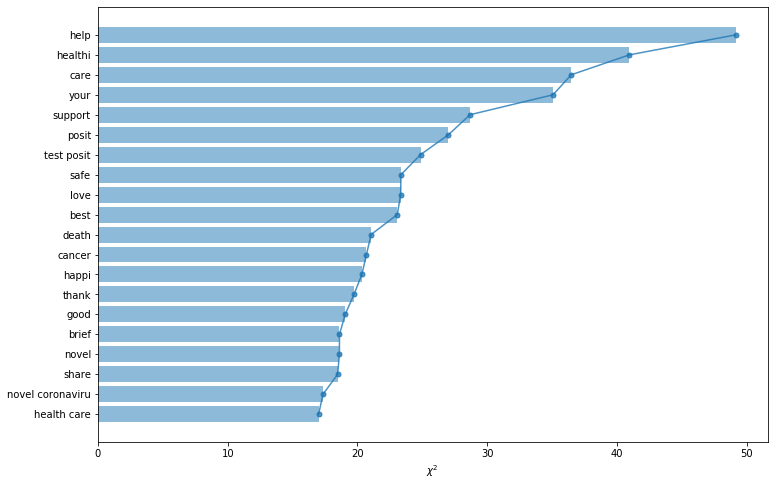

In [26]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(12,8))
scores = list(zip(tfidf.get_feature_names(), chi2score))
chi2 = sorted(scores, key=lambda x:x[1])
topchi2 = list(zip(*chi2[-20:]))
x = range(len(topchi2[1]))
labels = topchi2[0]
plt.barh(x,topchi2[1], align='center', alpha=0.5)
plt.plot(topchi2[1], x, '-o', markersize=5, alpha=0.8)
plt.yticks(x, labels)
plt.xlabel('$\chi^2$')
plt.show()

In [27]:
str = "i like the movie"
mylist = [str]
df_ex = pd.DataFrame(mylist, columns=['string'])

In [28]:
new_pred = sentiment_fit.predict(mylist)

In [29]:
new_pred

array([1], dtype=int64)

In [30]:
scores = df_ex['string'].apply(vader.polarity_scores).tolist()
scores_df = pd.DataFrame(scores)
df_ex = df_ex.join(scores_df, rsuffix='_right')

In [31]:
df_ex

,string,neg,neu,pos,compound
0,i didn't like the movie,0.413,0.587,0.0,-0.2755


In [32]:
from tkinter import * 
from PIL import ImageTk, Image  
from tkinter import filedialog
from tkinter.ttk import *
from tkinter.scrolledtext import ScrolledText

root = Tk()
root.title('Sentiment Analysis')
root.geometry('1360x780')

head = Label(root, text='Welcome To Sentiment Analysis', font='comicsansms 19 bold', background='#b35900', foreground='white')
head.pack(pady=20)

l1 = Label(root, text="Write any sentence in the following to do sentiment analysis", font='comicsansms 12', background='#b35900', foreground='white').pack(pady=10)
test = StringVar()
e1 = Entry(root, textvariable=test, font='comicsansms 10', width="60").pack()

def sentiment():
    str = test.get()
    mylist = [str]
    new_pred = sentiment_fit.predict(mylist)
    print(new_pred)

    df_ex = pd.DataFrame(mylist, columns=['string'])
    scores = df_ex['string'].apply(vader.polarity_scores).tolist()
    scores_df = pd.DataFrame(scores)
    df_ex = df_ex.join(scores_df, rsuffix='_right')
    
    compound_list = df_ex['compound'].to_list()
    new_compound_list = []
    for i in compound_list:
        if i <= 0:
            new_compound_list.append(0)
        else:
            new_compound_list.append(1)
    df_ex['sentiment'] = new_compound_list
    
    if df_ex['sentiment'][0] == 1:
        val = df_ex['pos'][0]
        val = val*100
        show = f"Above sentence is a POSITIVE sentence and the percentage of it's positiveness is {val}%"
        Label(root, text=show, font='comicsansms 12', background='#b35900', foreground='white').pack()
    
    if df_ex['sentiment'][0] == 0:
        val = df_ex['neg'][0]
        val = val*100
        show = f"Above sentence is a NEGATIVE sentence and the percentage of it's negativeness is {val}%"
        Label(root, text=show, font='comicsansms 12', background='#b35900', foreground='white').pack()
        
style = Style()
style.configure('W.TButton', font='comicsansms 12', background='#b35900')
btn = Button(root, text ='Submit', command = sentiment, style='W.TButton').pack(pady=20)

root['bg'] = '#b35900'
mainloop()